In [17]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
df_ext = pd.read_csv('../data/raw/dating_app_behavior_dataset_extended1.csv')

In [4]:
df = df_ext.copy()

In [ ]:
df['match_outcome'].unique()

array(['Mutual Match', 'Chat Ignored', 'Date Happened', 'No Action',
       'One-sided Like', 'Blocked', 'Relationship Formed', 'Catfished',
       'Ghosted', 'Instant Match'], dtype=object)

Positive: -> 1
- Mutual Match
- Date Happened
- Relationship Formed
- Instant Match

Negative:-> 0
- No Action
- One-sided Like
- Chat Ignored
- Ghosted
- Blocked
- Catfished

In [6]:
df['target_binary'] = df['match_outcome'].isin([
    'Mutual Match',
    'Date Happened',
    'Relationship Formed',
    'Instant Match'
]).astype(int)

In [7]:
df.dtypes

gender                   object
sexual_orientation       object
location_type            object
income_bracket           object
education_level          object
interest_tags            object
app_usage_time_min        int64
app_usage_time_label     object
swipe_right_ratio       float64
swipe_right_label        object
likes_received            int64
mutual_matches            int64
profile_pics_count        int64
bio_length                int64
message_sent_count        int64
emoji_usage_rate        float64
last_active_hour          int64
swipe_time_of_day        object
match_outcome            object
age                       int64
height_cm                 int64
weight_kg               float64
zodiac_sign              object
body_type                object
relationship_intent      object
target_binary             int64
dtype: object

** Target **
match_outcome   → categorical target
target_binary   → binary target（0/1）

** Features **

1.Numerical -> StandardScaler

app_usage_time_min
swipe_right_ratio
likes_received
mutual_matches
profile_pics_count
bio_length
message_sent_count
emoji_usage_rate
last_active_hour
age
height_cm
weight_kg

2.Ordinal -> Ordinal Encoding

income_bracket
education_level
app_usage_time_label
swipe_right_label

3. Nominal -> One-Hot Encoding

gender
sexual_orientation
location_type
swipe_time_of_day
zodiac_sign
body_type
relationship_intent
interest_tags


In [21]:
df['interest_tags'].unique()

array(['Fitness, Politics, Traveling', 'Languages, Fashion, Parenting',
       'Movies, Reading, DIY', ..., 'Traveling, Fitness, Stand-up Comedy',
       'Gaming, Motorcycling, Art', 'Skating, Astrology, Hiking'],
      shape=(40206,), dtype=object)

In [12]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [16]:
corr = df[numerical_cols].corr()
corr

,app_usage_time_min,swipe_right_ratio,likes_received,mutual_matches,profile_pics_count,bio_length,message_sent_count,emoji_usage_rate,last_active_hour,age,height_cm,weight_kg,target_binary
app_usage_time_min,1.000000,0.000490,-0.002879,0.008318,-0.006816,0.002045,-0.000944,0.003504,-0.000377,-0.007839,-0.004232,0.000258,0.002257
swipe_right_ratio,0.000490,1.000000,-0.004317,0.004139,-0.003321,-0.000201,-0.003280,-0.001835,0.000424,0.005846,-0.000469,-0.002786,-0.005502
likes_received,-0.002879,-0.004317,1.000000,0.205968,-0.008693,-0.000149,-0.001074,-0.001523,0.012123,-0.003081,0.008458,0.006268,0.000414
mutual_matches,0.008318,0.004139,0.205968,1.000000,0.005483,0.005855,-0.004002,0.002556,0.003438,0.000990,0.010265,0.008814,-0.007035
profile_pics_count,-0.006816,-0.003321,-0.008693,0.005483,1.000000,0.007614,0.010570,-0.005337,-0.013532,-0.009638,-0.001413,-0.006236,0.007733
bio_length,0.002045,-0.000201,-0.000149,0.005855,0.007614,1.000000,-0.000142,-0.008352,0.000726,-0.003063,0.001052,-0.000169,-0.003120
message_sent_count,-0.000944,-0.003280,-0.001074,-0.004002,0.010570,-0.000142,1.000000,0.003153,0.003439,0.012261,-0.005145,-0.004282,0.007653
emoji_usage_rate,0.003504,-0.001835,-0.001523,0.002556,-0.005337,-0.008352,0.003153,1.000000,-0.003734,-0.000400,0.005521,0.003625,0.001352
last_active_hour,-0.000377,0.000424,0.012123,0.003438,-0.013532,0.000726,0.003439,-0.003734,1.000000,0.007384,0.002659,0.005827,-0.002597
age,-0.007839,0.005846,-0.003081,0.000990,-0.009638,-0.003063,0.012261,-0.000400,0.007384,1.000000,-0.005119,-0.001690,-0.002294


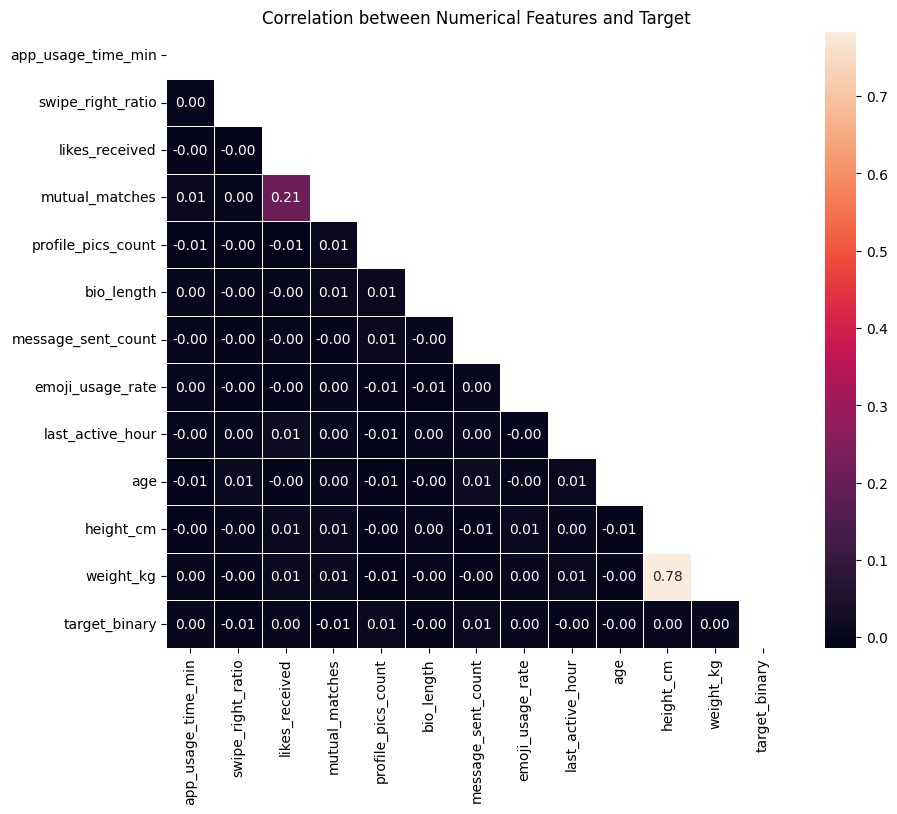

In [14]:
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="rocket",
    linewidths=0.5
)
plt.title("Correlation between Numerical Features and Target")
plt.show()

In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()